In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [22]:
df = pd.read_csv('../static/data/cctv.csv')
df.set_index('구별', inplace=True)
df.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483,0.406468,526.315431
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862,0.403444,710.063146
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814,0.274284,1156.473682
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743


In [27]:
tbl = []
for i in range(25):
    row =  {'idx':df.index[i], 'number':df['소계'][i], 'inc':df['최근증가율'][i], 
            'population':df['인구수'][i], 'ratio':df['cctv비율'][i]}
    tbl.append(row)

In [28]:
tbl[:5]

[{'idx': '강남구',
  'number': 5221,
  'inc': 52.17137860682017,
  'pop': 544085,
  'ratio': 0.959592710697777},
 {'idx': '강동구',
  'number': 1879,
  'inc': 82.96007789678677,
  'pop': 462275,
  'ratio': 0.406468011465037},
 {'idx': '강북구',
  'number': 1265,
  'inc': 83.06801736613603,
  'pop': 313550,
  'ratio': 0.4034444267262},
 {'idx': '강서구',
  'number': 1617,
  'inc': 77.88778877887789,
  'pop': 589536,
  'ratio': 0.2742835043152581},
 {'idx': '관악구',
  'number': 3985,
  'inc': 99.1504247876062,
  'pop': 514555,
  'ratio': 0.774455597555169}]

In [12]:
df_sort = df.sort_values('오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
송파구,1586,62.833676,676673,670331,6342,92149,0.937233,13.617951,0.234382,1439.555667
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
도봉구,858,66.601942,329300,327248,2052,61388,0.623140,18.641968,0.260553,1162.626928
중랑구,1068,22.477064,400989,395997,4992,68658,1.244922,17.122165,0.266341,1160.018799


In [11]:
# 산점도 위에 상관관계를 나타내는 선 그리기
fp1 = np.polyfit(df['인구수'], df['소계'], 1)
fp1

array([2.89293854e-03, 1.06798227e+03])

In [12]:
fx = np.array([100000, 700000])
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([1357.27612119, 3093.0392448 ])

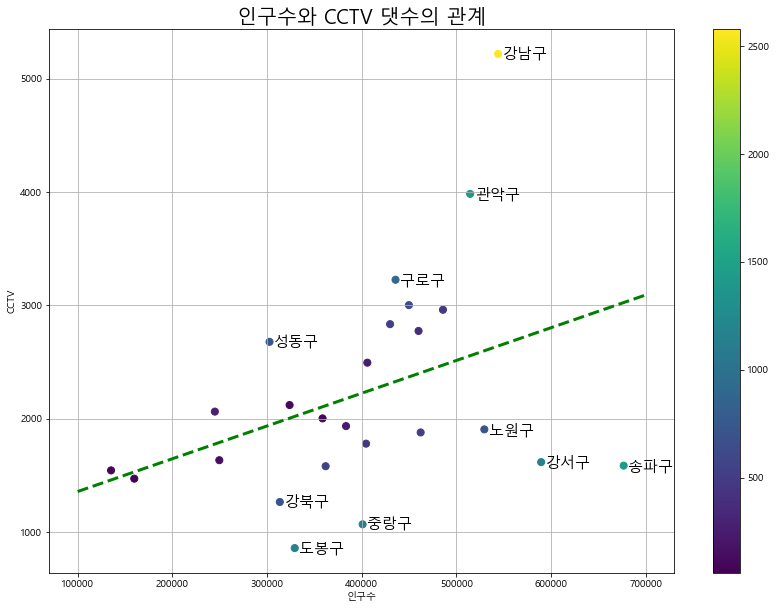

In [32]:
plt.figure(figsize=(14,10))
plt.scatter(df['인구수'], df['소계'], c=df['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(df_sort['인구수'][i]+5000, df_sort['소계'][i]-50,
             df_sort.index[i], fontsize=15)

plt.grid(True)
plt.title('인구수와 CCTV 댓수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()